# Data mining project

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use("ggplot")
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics 

## Load data

In [2]:
df = pd.read_csv("train.csv")
df.head(5)

,feat_56,feat_7,feat_69,feat_12,feat_70,feat_51,feat_20,feat_21,feat_61,feat_23,target
0,0,0,0,0,0,0,0,0,0,0,Class_2
1,1,0,0,0,0,0,0,0,0,0,Class_6
2,0,0,0,0,1,0,0,6,5,0,Class_6
3,0,0,0,0,6,0,0,0,0,0,Class_3
4,0,0,0,0,2,0,0,0,0,0,Class_3


### Find the most common classes and filter the dataset

In [3]:
print df.groupby('target').size()
df = df[(df['target'] == 'Class_6') | (df['target'] == 'Class_2')]
df.head(5)
print "now we have " + str(df.shape[0]) + " rows in our data"
row_num = df.shape[0]

target
Class_1     1423
Class_2    12059
Class_3     6018
Class_4     2077
Class_5     2067
Class_6    10660
Class_7     2086
Class_8     6302
Class_9     3716
dtype: int64
now we have 22719 rows in our data


## Explore the features

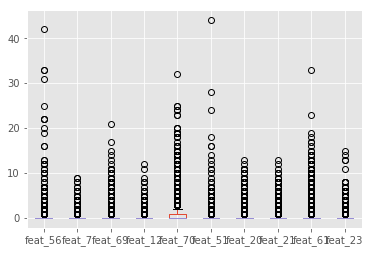

In [4]:
%matplotlib inline
df.describe()
df.boxplot()

### plot the distribution of each feture within the classes

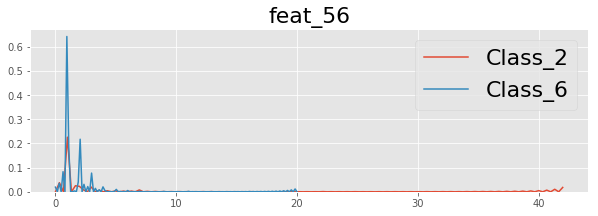

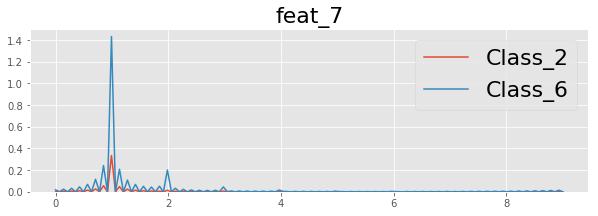

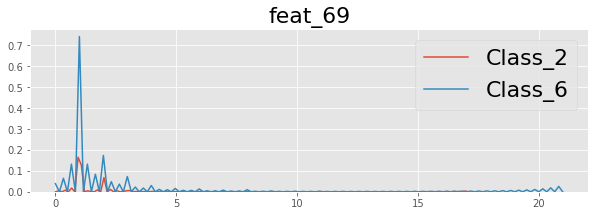

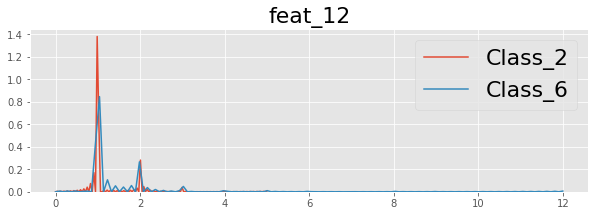

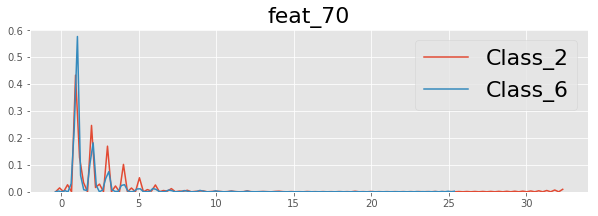

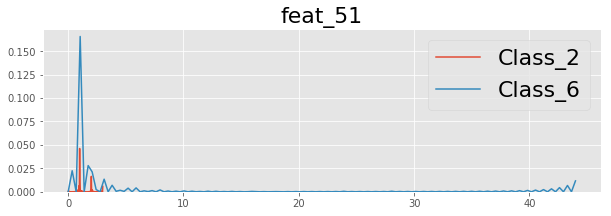

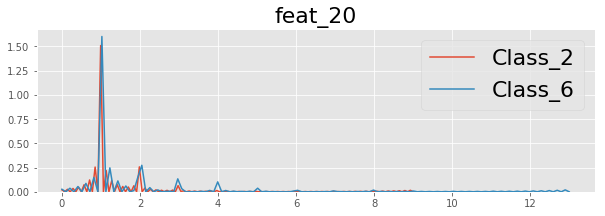

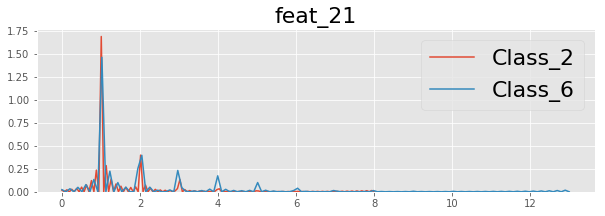

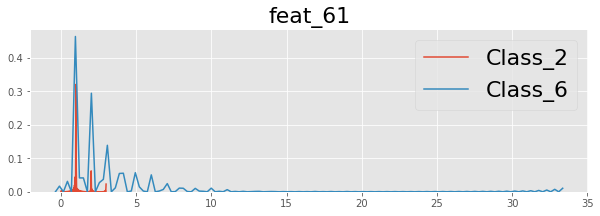

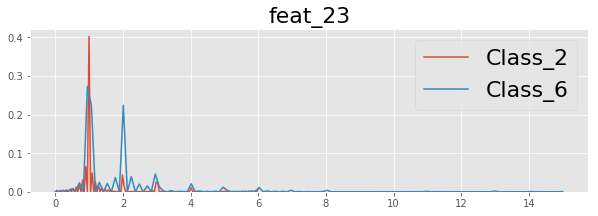

In [5]:
for col in df.columns[:-1]:
    plt.figure(figsize=(10,3))
    sns.kdeplot(df.loc[df.target=='Class_2',col], label='Class_2')
    sns.kdeplot(df.loc[df.target=='Class_6',col], label='Class_6')
    plt.legend(fontsize=22)
    plt.title(col, fontsize=22);

### Understand the sparse of each feture

Non zeros percent in each feture:


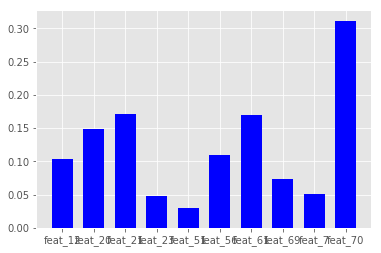

feat_56    0.110304
feat_7     0.050574
feat_69    0.073155
feat_12    0.103350
feat_70    0.311457
feat_51    0.030327
feat_20    0.148818
feat_21    0.171530
feat_61    0.169990
feat_23    0.047889
dtype: float64


In [6]:
print "Non zeros percent in each feture:"
y = ((df !=0).sum() / row_num)[:-1]
x = df.columns[:-1]
width = 1/1.5
plt.bar(x, y, width, color="blue")
plt.show()
print y
# we can see that the data very sparse, places withot zero are very important- we will build new fetures based on this insight

In [7]:
#המחשבה שלי פה זה ליצור גרף שמראה כמה לא אפסים יש בכל פיצ'ר ביחס לכמות הרשומות בכל קלאס, עוד לא סיימתי עם זה
#צריך גם להוסיף עמודה של כמה אפסים יש בכל רשומה, מסתמן שזה פיצ'ר חשוב פה
print "now with respect to target:"
for col in df.columns[:-1]:
    bar_1 = ((df[(df[col] != 0) & (df['target']=='Class_2')]).shape[0]) / float(df[df['target'] == "Class_2"].shape[0])
    bar_2 = (df[(df[col] != 0) & (df['target']=='Class_6')]).shape[0] / float(df[df['target'] == "Class_6"].shape[0])
    pd.DataFrame(np.array([bar_1,bar_2])).plot.bar
    plt.show()
    

now with respect to target:


### Understand the features correlation

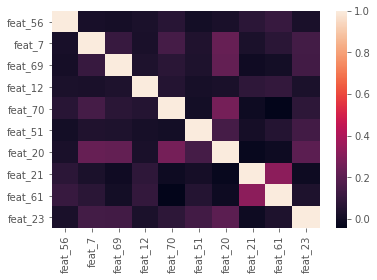

In [8]:
cor_mat = df.corr()
cor_mat
sns.heatmap(cor_mat)

### PCA

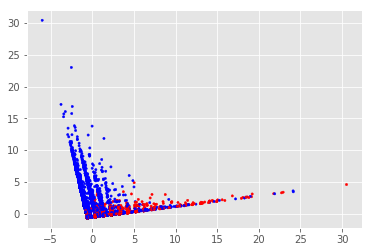

In [9]:
x = df.drop(['target'], axis=1)
y = df['target']=='Class_2'
pca = PCA(n_components=2)
pca.fit(x)
reduced_data_PCA = pca.transform(x)
plt.scatter(reduced_data_PCA[:, 0], reduced_data_PCA[:, 1], c=y, s=5, cmap = "bwr")
plt.show()

we can see that the PCA components are not very effective to seperate between the two classes

### LDA

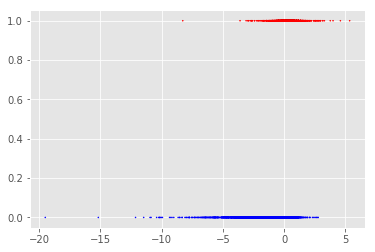

In [10]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(x, y)
reduced_data_LDA = LDA.transform(x)
plt.scatter(reduced_data_LDA[:, 0], y, c=y, s=1, cmap = "bwr")
plt.show()

# feture extraction

In [11]:
# insert the number of zeros for each row
df['zeros_number'] = (df == 0).astype(int).sum(axis=1)
df

,feat_56,feat_7,feat_69,feat_12,feat_70,feat_51,feat_20,feat_21,feat_61,feat_23,target,zeros_number
0,0,0,0,0,0,0,0,0,0,0,Class_2,10
1,1,0,0,0,0,0,0,0,0,0,Class_6,9
2,0,0,0,0,1,0,0,6,5,0,Class_6,7
5,0,0,0,0,0,0,0,0,0,0,Class_6,10
6,0,0,0,0,0,0,0,0,0,0,Class_2,10
7,0,0,0,0,0,0,0,1,4,0,Class_6,8
8,1,0,0,0,7,0,1,1,0,0,Class_2,6
9,0,0,0,0,0,0,1,0,0,0,Class_6,9
11,0,0,0,0,0,0,0,0,0,0,Class_2,10
15,0,0,0,0,0,0,0,0,0,0,Class_2,10


In [12]:
# we have al lot of rows with 10 zeros (all the fetures are 0), let's check if we can remove them as outliars
print df[(df['zeros_number']==10) & (df['target']=='Class_2')].shape[0]
print df[(df['zeros_number']==10) & (df['target']=='Class_6')].shape[0]

6196
2385


# Clasification Model- Initial Models

In [137]:
train = df.sample(frac=0.7)
x_train= train.loc[:,:'feat_23']
y_train = train['target']

test = df[~df.isin(train)].dropna()
x_test= train.loc[:,:'feat_23']
y_test = train['target']

## Naive Bayes Calssifier

In [81]:
GNB = GaussianNB(priors = None)

In [102]:
GNB_fit = GNB.fit(x_train, y_train)

In [83]:
print "a matrix of the mean locations for each class, for each dimension:"  
print clf.theta_
print 
print "a matrix of the variance for each class, for each dimension:"
print clf.sigma_

a matrix of the mean locations for each class, for each dimension:
[[ 0.11661739  0.02034299  0.05759905  0.09142519  0.77267889  0.00189237
   0.12678888  0.17031342  0.01194559  0.02992312]
 [ 0.24261547  0.11801826  0.17709452  0.16850161  0.56968314  0.12526853
   0.34411923  0.45649839  0.94777121  0.14030612]]

a matrix of the variance for each class, for each dimension:
[[  9.07748702e-01   3.38853963e-02   1.13891104e-01   1.13108024e-01
    2.92644457e+00   3.54461766e-03   2.28040489e-01   3.31016995e-01
    1.60607351e-02   6.11980450e-02]
 [  5.76073291e-01   2.11769867e-01   5.20597790e-01   2.78669508e-01
    1.78005296e+00   8.76225091e-01   7.82092164e-01   1.11491749e+00
    3.55863091e+00   4.10631058e-01]]


In [95]:
GNB_prediction = GNB.predict(x_test)
Score= GNB.score(x_test, y_test)
Score

0.73080550839464253

In [138]:
y_train.ix[y_train=='Class_2'] = 0
y_train.ix[y_train=='Class_6'] = 1
y_test.ix[y_train=='Class_2'] = 0
y_test.ix[y_train=='Class_6'] = 1

/Users/yogevmatalon/anaconda/envs/python27/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [139]:
%matplotlib inline
import seaborn as sns
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, confusion_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline


def find_best_threshold(thresholds, fpr, tpr):
    """
    find the best threshold from the roc curve. by finding the threshold for the point which is closest to (fpr=0,tpr=1)
    """
    fpr_tpr = pd.DataFrame({'thresholds': thresholds, 'fpr': fpr, 'tpr': tpr})
    fpr_tpr['dist'] = (fpr_tpr['fpr'])**2 + (fpr_tpr['tpr']-1)**2
    return fpr_tpr.ix[fpr_tpr.dist.idxmin(), 'thresholds']


def get_model_results(model, train, test, y_train, y_test):
    probabilities = model.predict_proba(test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, probabilities)
    threshold = find_best_threshold(thresholds, fpr, tpr)
    predictions = probabilities>threshold
    plt.figure()
    plt.plot(fpr, tpr, label='test')
    roc_auc = roc_auc_score(y_test, probabilities)
    probabilities = model.predict_proba(train)[:,1]
    fpr, tpr, thresholds = roc_curve(y_train, probabilities)
    plt.plot(fpr, tpr, label='train')
    plt.plot([0, 1], [0, 1], 'r--', label='random guess')
    plt.title("area under the ROC curve = {}".format(roc_auc), fontsize=18);
    print(classification_report(y_test, predictions))
    plt.legend()

model = make_pipeline(GaussianNB(priors = None))
model.fit(x_train, y_train)
get_model_results(model, x_train, x_test, y_train, y_test)

ValueError: Unknown label type: (array([0, 1], dtype=object),)